In [10]:
# !rm -rf sec-edgar-filings
# !rm -rf persis_dir
# !du -sh persist_dir

369M	persist_dir


In [5]:
# !pip install -r requirements.txt
# !python download.py -after 2020
# !python preprocess.py
# !python embedding.py

## API key
Need to put OpenAI API key in the file `openai_api_key.txt` or set the environment variable `OPENAI_API_KEY` to the key.

## Download, clean, and create vector DB
This can take 10 mins to finish.

In [7]:
%%time
!pip install -r requirements.txt
!python building_vectordb.py

No 10-K found for AAPL in 1998...continuing...
No 10-K found for AAPL in 2001...continuing...
Error occurred while downloading filing for accession number {}: {} 0001032210-00-001961 404 Client Error: Not Found for url: https://www.sec.gov/Archives/edgar/data/789019/000103221000001961/0001.txt
AAPL 27
MSFT 29
Preprocessing AAPL-10-K-2006.txt...
compression ratio: 13.40%
Preprocessing AAPL-10-K-2005.txt...
compression ratio: 14.42%
Preprocessing AAPL-10-K-1997.txt...
compression ratio: 41.86%
Preprocessing AAPL-10-K-2021.txt...
compression ratio: 2.31%
Preprocessing AAPL-10-K-1996.txt...
compression ratio: 71.97%
Preprocessing AAPL-10-K-2013.txt...
compression ratio: 3.10%
Preprocessing AAPL-10-K-2012.txt...
compression ratio: 3.30%
Preprocessing AAPL-10-K-2019.txt...
compression ratio: 2.14%
Preprocessing AAPL-10-K-2002.txt...
compression ratio: 42.60%
Preprocessing AAPL-10-K-2007.txt...
compression ratio: 37.80%
Preprocessing AAPL-10-K-2015.txt...
compression ratio: 3.73%
Preprocessin

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import query_1
import embedding


from llama_index.core import load_index_from_storage
from llama_index.core import StorageContext


## Load Vector DB into memory
This can take 5 mins to finish.

In [ ]:
persist_dir="persist_dir"

storage_context = StorageContext.from_defaults(persist_dir=persist_dir)
index = load_index_from_storage(storage_context)

##  Track some key fact in the anual report.
This part will call chatgpt-3.5 many times.

In [ ]:
years = ['2018','2019','2020','2021','2022','2023']
key_facts = ['R&D expense', 'net income', 'revenue']

In [91]:
ticker = 'AAPL'
ss = []
for key_fact in key_facts:
    output = query_1.loop_query_1(index, ticker, years, key_fact)
    s = pd.Series(output, name=key_fact)
    ss.append(s)

df = pd.concat(ss, axis=1)

API key found
Querying AAPL 2018 R&D expense...
The Research and Development (R&D) expense for 2018 in the AAPL 10-K file is $14,236 million, as stated on page 37.

`python: 14.236`
Querying AAPL 2019 R&D expense...
The Research and Development ("R&D") expense for 2019 in the AAPL 10-K file of AAPL 2019 is $16.217 billion. It can be found on page 29.

`python: 16.217`
Querying AAPL 2020 R&D expense...
The Research and Development (R&D) expense for 2020 in the AAPL 10-K file of 2020 is $18,752 million. It can be found on page 23 of the document.

`python: 18.752`
Querying AAPL 2021 R&D expense...
The Research and Development ("R&D") expense for 2021 in the AAPL 10-K file is $21,914 million on page 17.

python: 21.914
Querying AAPL 2022 R&D expense...
The Research and Development (R&D) expense for Apple Inc. in the 10-K file of AAPL 2022 is $29,915 million for 2022, as stated on page 47.

python: 29.915
Querying AAPL 2023 R&D expense...
The Research and Development (R&D) expense for 2023

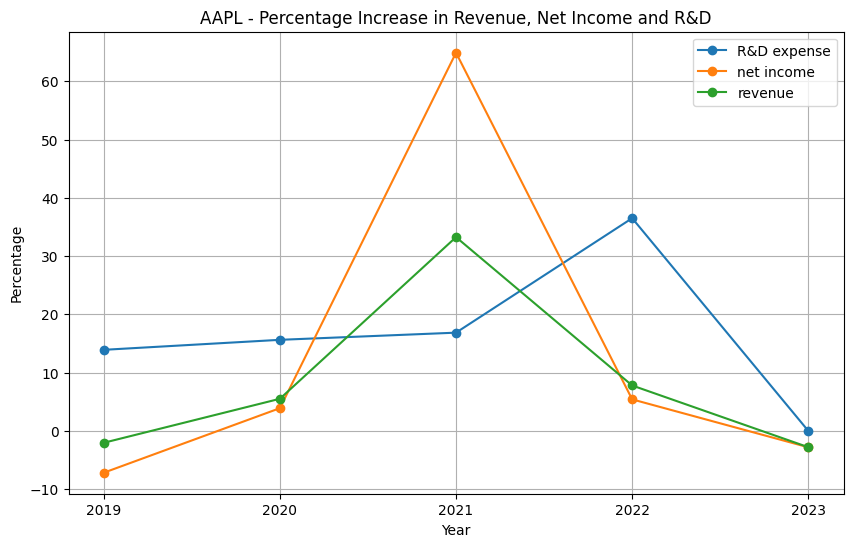

In [92]:
for key_fact in key_facts:
    df[key_fact+' increase'] = ((df[key_fact] - df[key_fact].shift(1)) / df[key_fact].shift(1)) * 100

plt.figure(figsize=(10, 6))

for key_fact in key_facts:
    plt.plot(df.index, df[key_fact+' increase'], marker='o', label=key_fact)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title(f'{ticker} - Percentage Increase in Revenue, Net Income and R&D')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
ticker = 'MSFT'
ss = []
for key_fact in key_facts:
    output = query_1.loop_query_1(index, ticker, years, key_fact)
    s = pd.Series(output, name=key_fact)
    ss.append(s)

df = pd.concat(ss, axis=1)

API key found
Querying MSFT 2018 R&D expense...
The Research and Development expense for 2018 in the MSFT 10-K file is $13.0 billion, as stated on page 38.

python: 13.0
Querying MSFT 2019 R&D expense...
The Research and Development expense for 2019 in the MSFT 10-K file is $13.037 billion, and it is mentioned on page 38.

python: 13.037
Querying MSFT 2020 R&D expense...
The Research and Development expense for 2020 in the MSFT 10-K file is $19.269 billion, and it is mentioned on page 30.

`python: 19.269`
Querying MSFT 2021 R&D expense...
The Research and Development expense for 2021 in the MSFT 10-K file is $27.195 billion, and this information can be found on page 65.

python: 27.195
Querying MSFT 2022 R&D expense...
The Research and Development expense for 2022 in the MSFT 10-K file is $27.195 billion, and this information can be found on page 29.

`python: 27.195`
Querying MSFT 2023 R&D expense...
The Research and Development expense for 2023 in the MSFT 10-K file is $27.195 billi

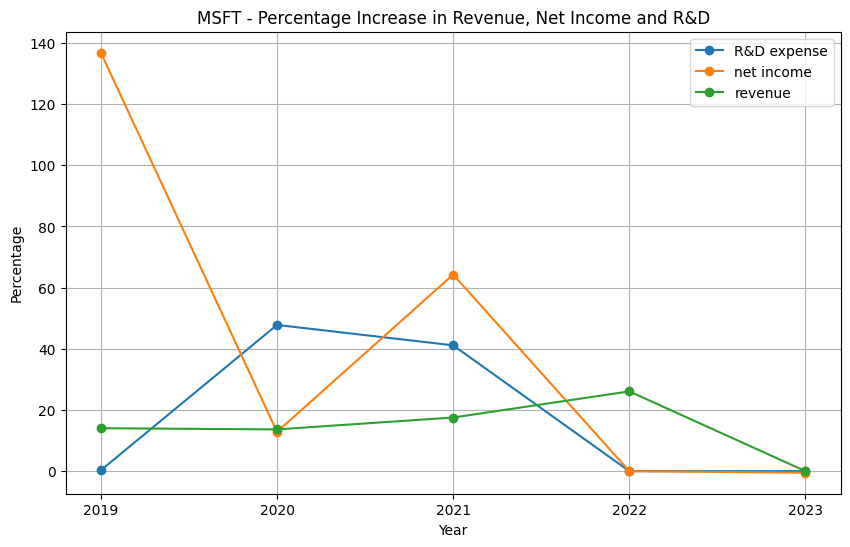

In [94]:
for key_fact in key_facts:
    df[key_fact+' increase'] = ((df[key_fact] - df[key_fact].shift(1)) / df[key_fact].shift(1)) * 100

plt.figure(figsize=(10, 6))

for key_fact in key_facts:
    plt.plot(df.index, df[key_fact+' increase'], marker='o', label=key_fact)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title(f'{ticker} - Percentage Increase in Revenue, Net Income and R&D')
plt.legend()
plt.grid(True)
plt.show()
